# <p style="font-family: Fantasy, fantasy; line-height: 3.3; font-size: 40px; letter-spacing: 5px; text-align: center; color: #4d4dff">Detecting FRAUD transactions of ETHEREUM</p>
![](https://miro.medium.com/max/1000/1*Jg_EBfBl8yOa6r1i9pCMEw.png)

In [ ]:
# running k(k=10)-fold coss-validation on dataset1. Running 10 iterations
# storing max and min precision value of each iteration and showing 
# max, min, variance and average precision

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Libraries</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
import pickle
from sklearn.neighbors import KNeighborsClassifier

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data Reading</p>

In [2]:
df = pd.read_csv('../input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=0)
print(df.shape)
df.head()

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
df.describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [4]:
df.var()

Index                                                   1.494804e+06
FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

In [6]:
# Ommit first two columns (Index, Adress)
df = df.iloc[:,2:]

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data information & exploration</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [8]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [9]:
# Inspect categoricals
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

The categorical column -- ERC20 most sent token type-- has --305-- unique values
The categorical column -- ERC20_most_rec_token_type-- has --467-- unique values


In [10]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [11]:
# Inspect features variance
df[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

0    7662
1    2179
Name: FLAG, dtype: int64


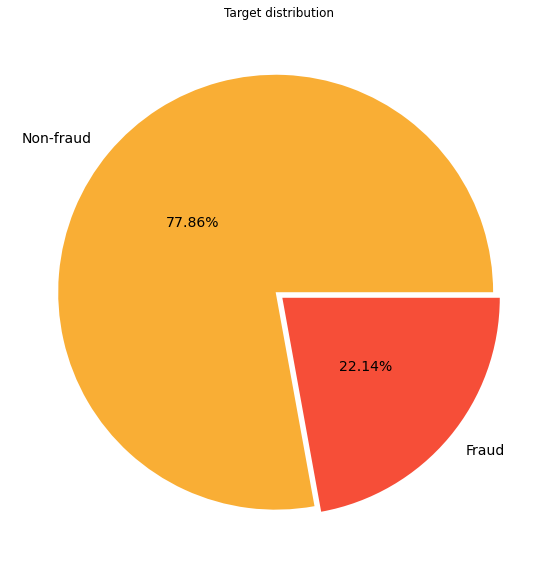

In [12]:
# Inspect target distribution
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

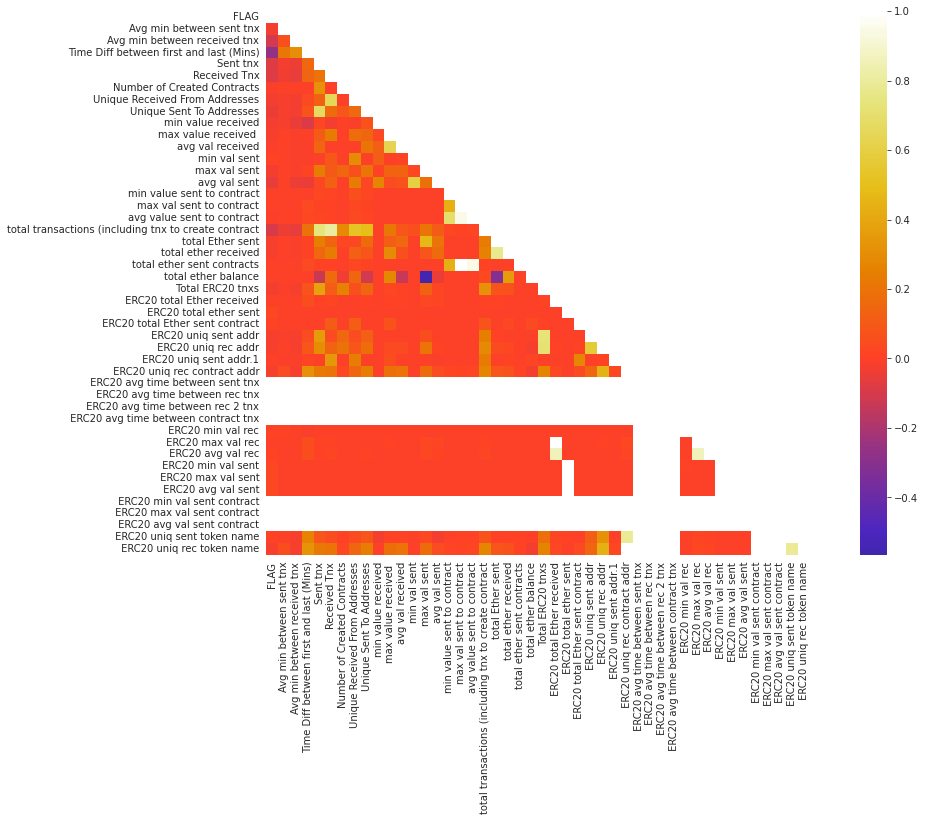

In [13]:
# Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data cleaning</p>

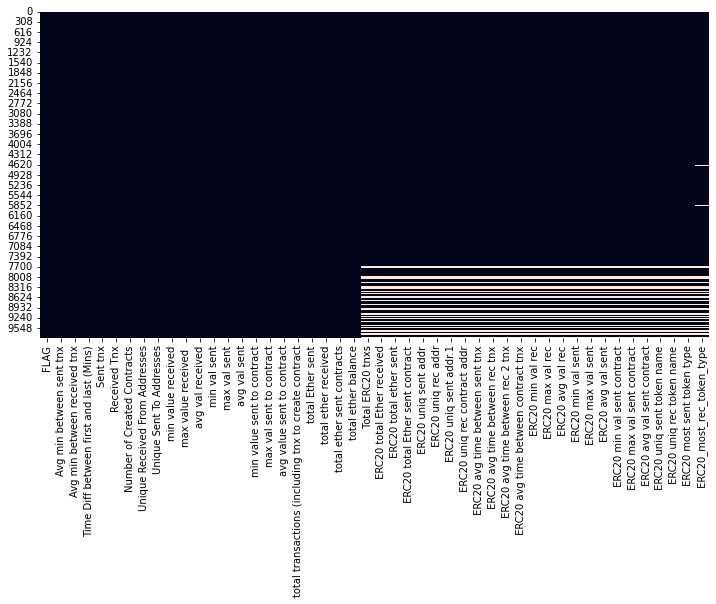

In [14]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [15]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [16]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

(9841, 46)


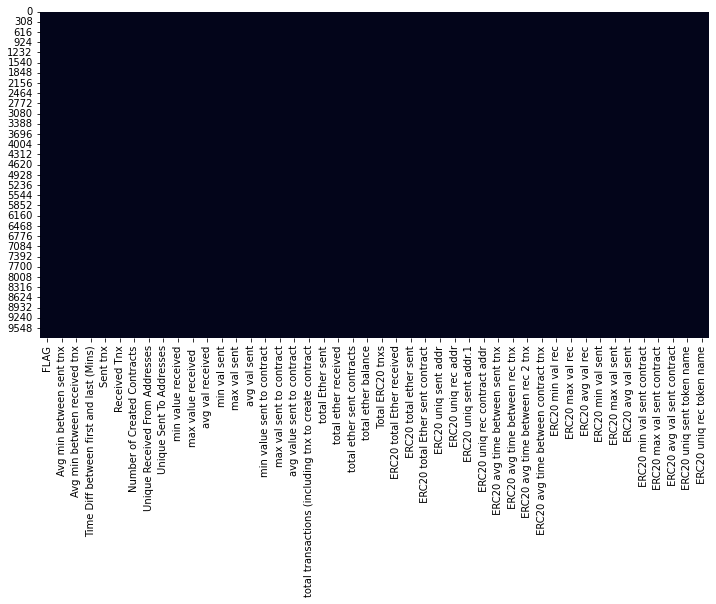

In [17]:
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Investigating the variance of the features, it was observed that there are some features with a variance = 0

In [18]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

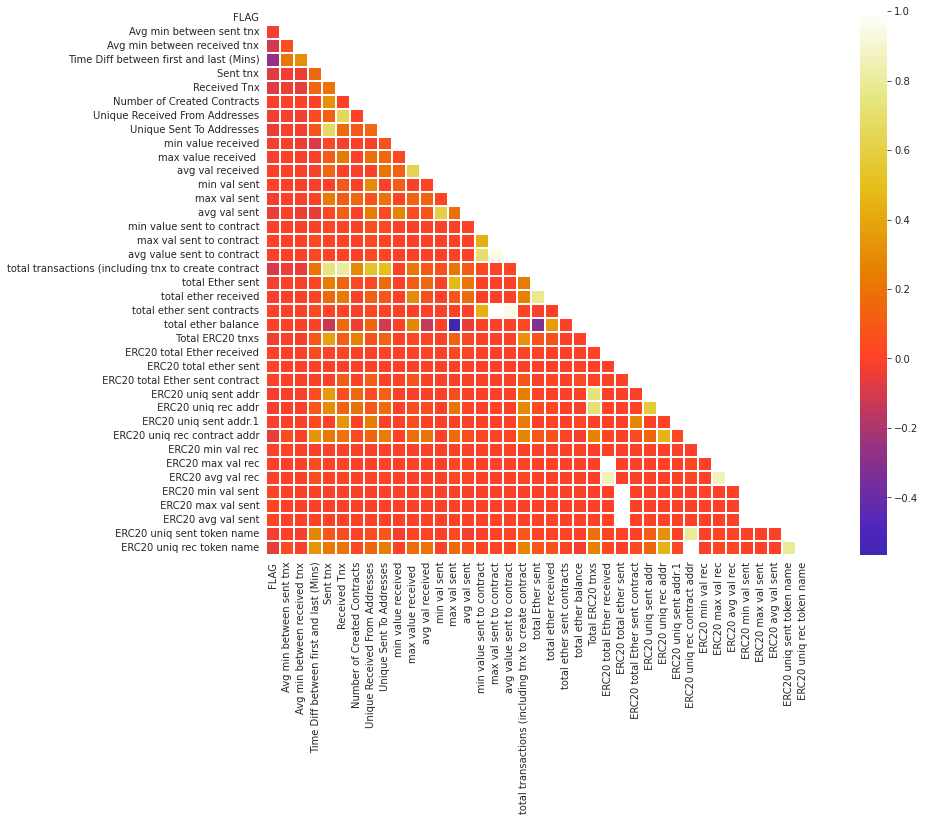

In [20]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

Drop one of those highly correlated features
    

In [21]:
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
df.drop(drop, axis=1, inplace=True)

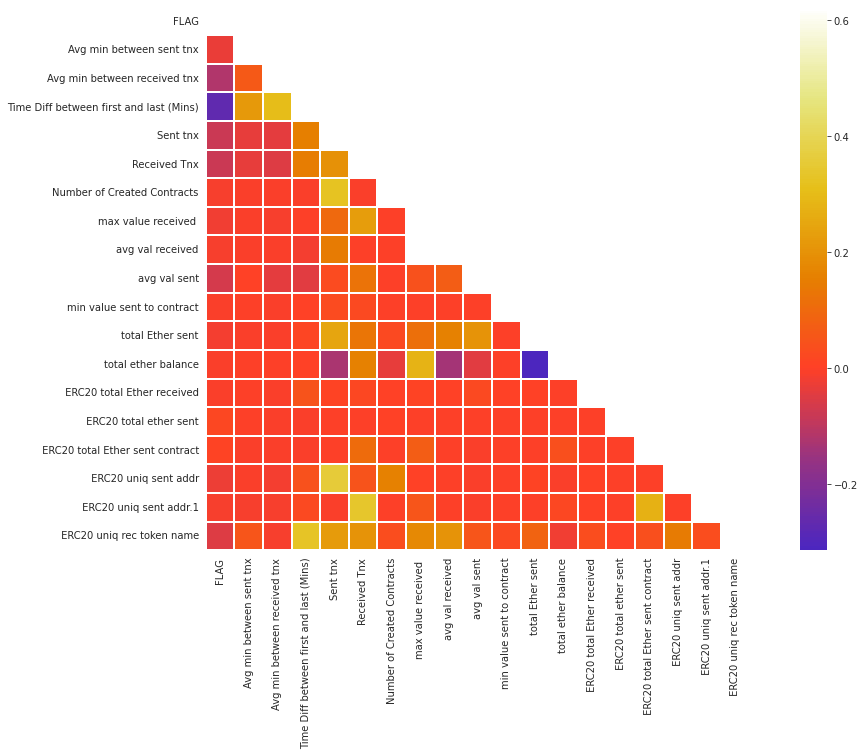

In [22]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [23]:
columns = df.columns
columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

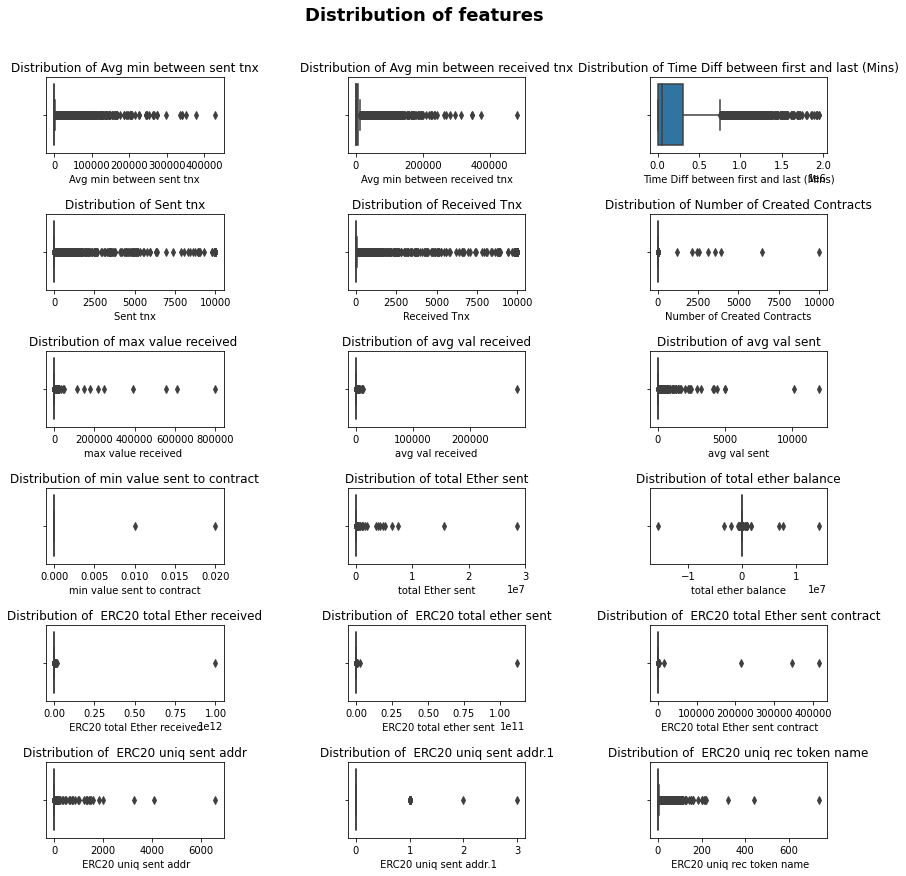

In [24]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [25]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


It can be observed that the values of these two variables are mosty 0s. Thus, both features will be discarded since they will not be helpful for our model

In [26]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data preparation</p>

In [27]:
df = df.sample(frac = 1.0)
y = df.iloc[:, 0].to_numpy()
X = df.iloc[:, 1:].to_numpy()
print(X.shape, y.shape)
print("sum of y_train")
print(sum(y))

(9841, 16) (9841,)
sum of y_train
2179


KFold(n_splits=10, random_state=None, shuffle=False)
(8856, 16) (8856,)
(985, 16) (985,)
sum of y_train
1973
Shape of the training before SMOTE: ((8856, 16), (8856,))
Shape of the training after SMOTE: ((13766, 16), (13766,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 1973
AFTER OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 6884
[[690  89]
 [ 15 191]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1979
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13756, 16), (13756,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 1979
AFTER OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 6879
[[706  78]
 [ 31 169]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1975
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13764, 16), (13764,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 1975
AFTER OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 6883
[[678 102]
 [ 21 183]]
(8857, 16) (8857,)
(984, 16) (98

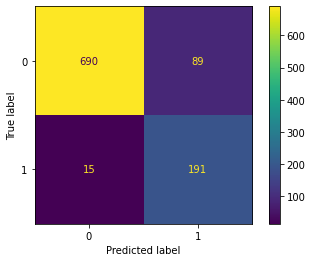

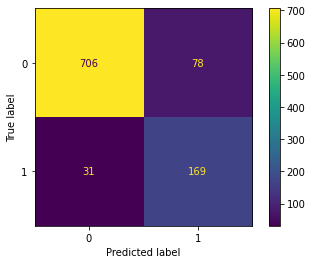

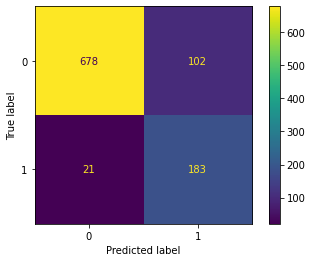

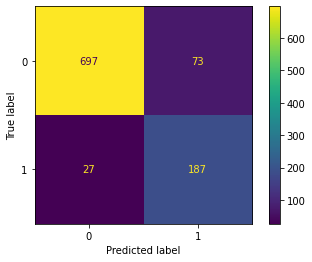

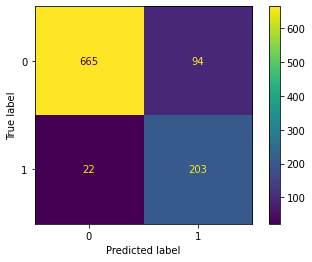

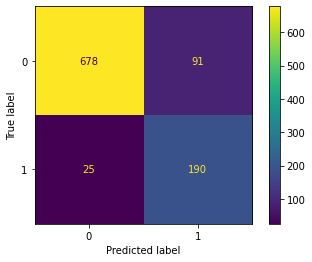

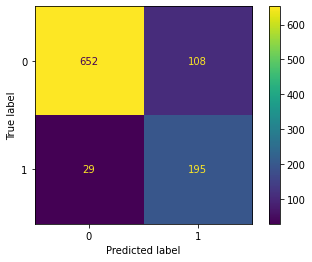

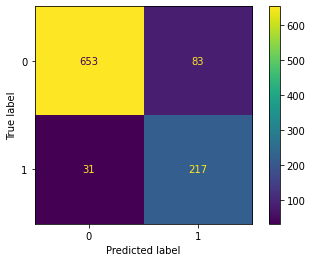

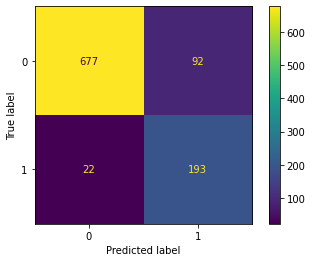

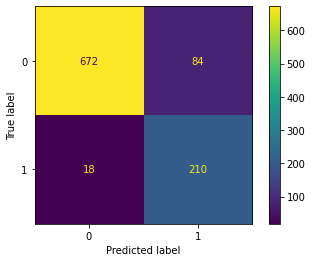

In [28]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    LR = LogisticRegression(random_state=42)
    LR.fit(x_tr_resample, y_tr_resample)

    # Transform test features
    norm_test_f = norm.transform(X_test)

    preds = LR.predict(norm_test_f)
    # print(preds)
    #print(classification_report(y_test, preds))
    dict = classification_report(y_test, preds, output_dict=True)
    precisionList.append(dict['0']['precision'])
    
    print(confusion_matrix(y_test, preds))
    plot_confusion_matrix(LR, norm_test_f, y_test)
ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()

**Random Forest Classifier**

KFold(n_splits=10, random_state=None, shuffle=False)
(8856, 16) (8856,)
(985, 16) (985,)
sum of y_train
1973
Shape of the training before SMOTE: ((8856, 16), (8856,))
Shape of the training after SMOTE: ((13766, 16), (13766,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 1973
AFTER OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 6884
[[773   6]
 [  9 197]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1979
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13756, 16), (13756,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 1979
AFTER OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 6879
[[778   6]
 [ 18 182]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1975
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13764, 16), (13764,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 1975
AFTER OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 6883
[[760  20]
 [ 10 194]]
(8857, 16) (8857,)
(984, 16) (98

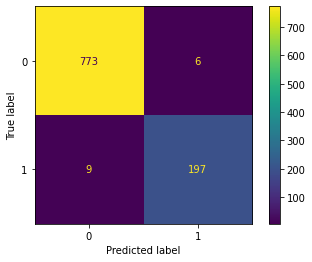

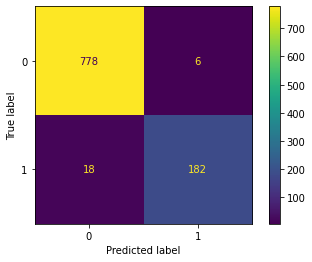

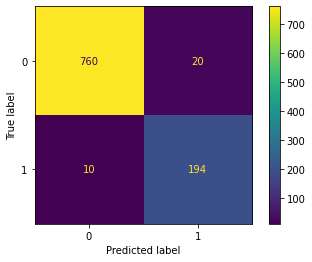

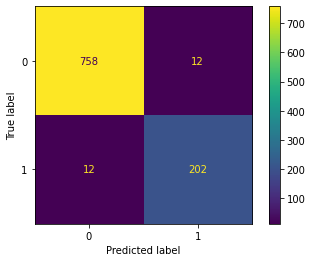

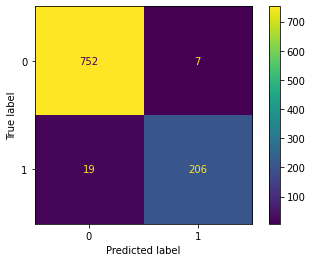

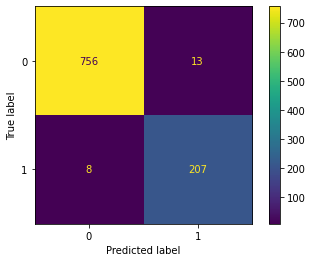

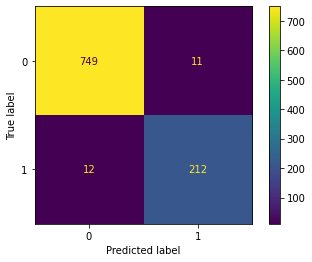

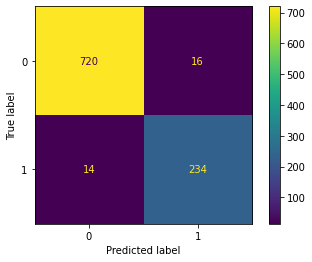

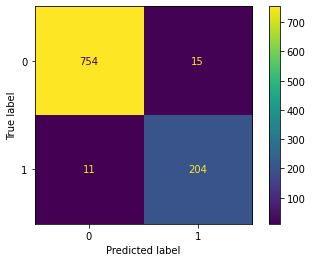

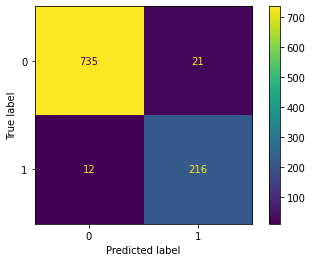

In [29]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    RF = RandomForestClassifier(random_state=42)
    RF.fit(x_tr_resample, y_tr_resample)
    norm_test_f = norm.transform(X_test)
    preds_RF = RF.predict(norm_test_f)
    # print(classification_report(y_test, preds_RF))
    dict = classification_report(y_test, preds_RF, output_dict=True)
    precisionList.append(dict['0']['precision'])
    print(confusion_matrix(y_test, preds_RF))
    plot_confusion_matrix(RF, norm_test_f, y_test)

ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()

**XGB Classifier**

KFold(n_splits=10, random_state=None, shuffle=False)
(8856, 16) (8856,)
(985, 16) (985,)
sum of y_train
1973
Shape of the training before SMOTE: ((8856, 16), (8856,))
Shape of the training after SMOTE: ((13766, 16), (13766,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 1973
AFTER OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 6884
[[773   6]
 [  7 199]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1979
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13756, 16), (13756,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 1979
AFTER OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 6879
[[775   9]
 [ 19 181]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1975
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13764, 16), (13764,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 1975
AFTER OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 6883
[[772   8]
 [ 10 194]]
(8857, 16) (8857,)
(984, 16) (98

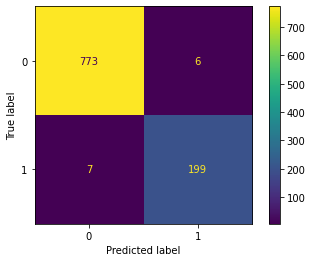

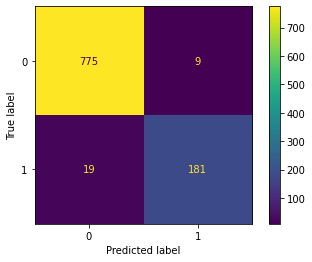

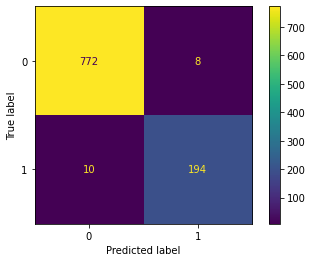

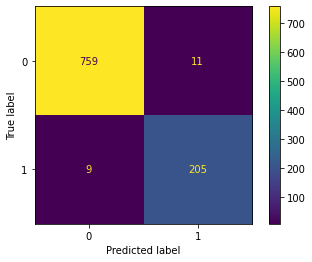

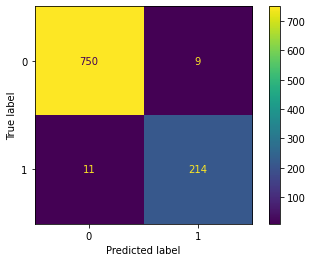

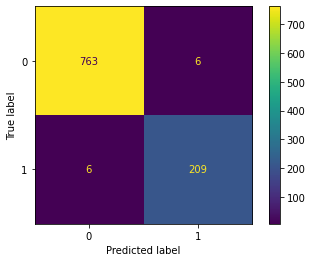

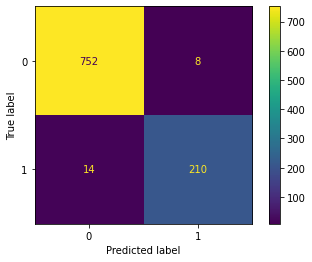

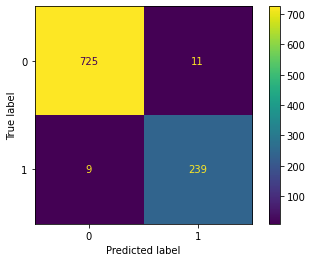

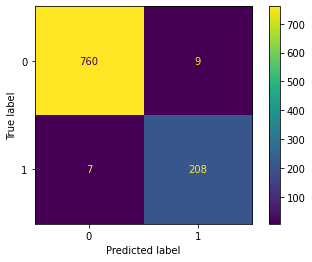

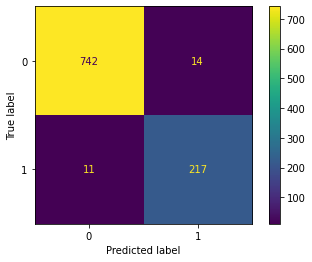

In [30]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    xgb_c = xgb.XGBClassifier(random_state=42)
    xgb_c.fit(x_tr_resample, y_tr_resample)
    norm_test_f = norm.transform(X_test)
    preds_xgb = xgb_c.predict(norm_test_f)
    # print(classification_report(y_test, preds_xgb))
    dict = classification_report(y_test, preds_xgb, output_dict=True)
    precisionList.append(dict['0']['precision'])
    print(confusion_matrix(y_test, preds_xgb))
    plot_confusion_matrix(xgb_c, norm_test_f, y_test)

ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()

# K-Nearest Neighoburs

KFold(n_splits=10, random_state=None, shuffle=False)
(8856, 16) (8856,)
(985, 16) (985,)
sum of y_train
1973
Shape of the training before SMOTE: ((8856, 16), (8856,))
Shape of the training after SMOTE: ((13766, 16), (13766,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 1973
AFTER OVERSAMPLING 
 	Non-frauds: 6883 
 	Fauds: 6884
[[740  39]
 [  6 200]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1979
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13756, 16), (13756,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 1979
AFTER OVERSAMPLING 
 	Non-frauds: 6878 
 	Fauds: 6879
[[764  20]
 [ 21 179]]
(8857, 16) (8857,)
(984, 16) (984,)
sum of y_train
1975
Shape of the training before SMOTE: ((8857, 16), (8857,))
Shape of the training after SMOTE: ((13764, 16), (13764,))
BEFORE OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 1975
AFTER OVERSAMPLING 
 	Non-frauds: 6882 
 	Fauds: 6883
[[742  38]
 [  6 198]]
(8857, 16) (8857,)
(984, 16) (98

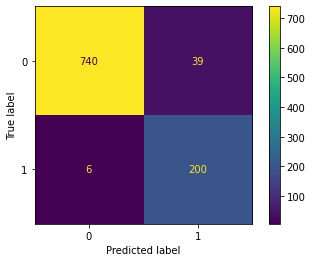

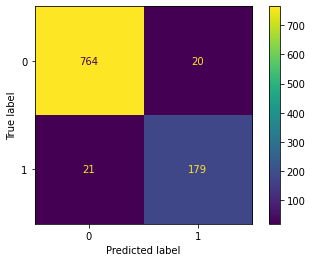

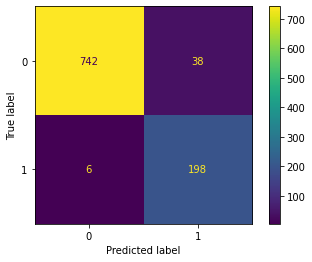

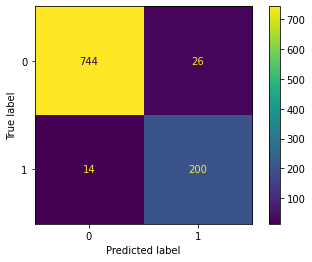

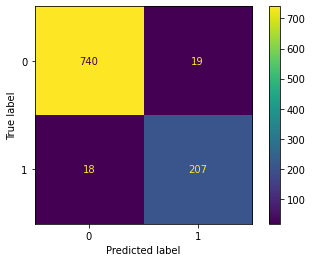

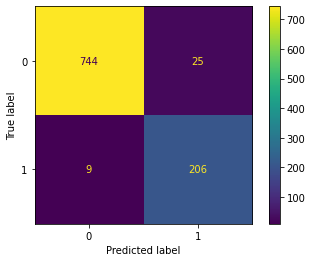

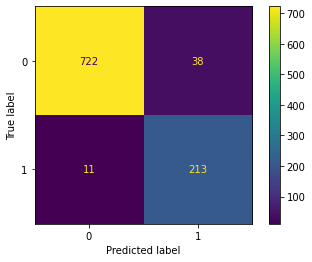

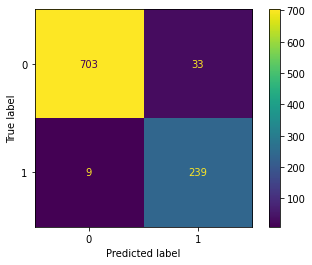

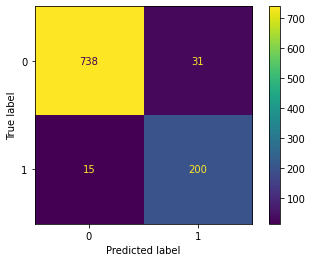

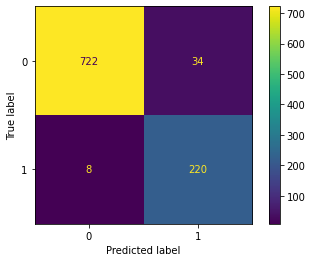

In [31]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
precisionList = []
print(kf)

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    print("sum of y_train")
    print(sum(y_train))
    
    # Normalize the training features
    norm = PowerTransformer()
    norm_train_f = norm.fit_transform(X_train)
    
    oversample = SMOTE()
    print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')
    x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
    print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')
    
    # Target distribution before SMOTE
    non_fraud = 0
    fraud = 0

    for i in y_train:
        if i == 0:
            non_fraud +=1
        else:
            fraud +=1

    # Target distribution after SMOTE
    no = 0
    yes = 1

    for j in y_tr_resample:
        if j == 0:
            no +=1
        else:
            yes +=1


    print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
    print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_tr_resample, y_tr_resample)
    norm_test_f = norm.transform(X_test)
    pred = knn.predict(norm_test_f)
    # print(classification_report(y_test, preds))
    dict = classification_report(y_test, pred, output_dict=True)
    precisionList.append(dict['0']['precision'])
    print(confusion_matrix(y_test, pred))
    plot_confusion_matrix(knn, norm_test_f, y_test)

ave = sum(precisionList) / len(precisionList)
var = sum((i - ave) ** 2 for i in precisionList) / len(precisionList)
print()
print("Precision Info: ")
print("Minimum Precision: " + str(min(precisionList)))
print("Maximum Precision: " + str(max(precisionList)))
print("Average Precision: " + str(ave))
print("Variance Precision: " + str(var))
print()